## FinSim Uganda Data Codebook

### Goal of this notebook

This jupyter notebook is used to create new data frames for the analysis part of my master's thesis and includes all the graphs/ visuals used within the thesis.

### Information about the thesis
Title of the thesis: Game Changer: Mobile Apps Leveling Up Field Experiments
Student: Lucie Schulz
Advisor: Andrew Hobbs

Department of Economics University of San Francisco 
2130 Fulton St. 
San Francisco, CA 94117

Thesis Submission for the Master of Science Degree 
in Applied Economics 

If you have any questions please e-mail: lschulz@dons.usfca.edu

### Overview:

1. Reading in Raw Data and Overview of Data Set
2. Renaming of Variables
3. Error Counts - Calculated Fields
4. Create sub dataframes for regression models
5. Session Length - Calculated Field
6. Distribution of Decisions Made per User
7. Histogram Survey Question Baseline: Digital Learning Tools
8. Error Distribution Type 1 and 2
9. Decisions Speed Overview
10. Overview Decisions based on ROI and decision made

In [50]:
# Packages used for analysis
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Reading in Raw Data and Overview of Data Set

In [51]:
# Import cleaned dataset - You might have to change that based on the path to the cleaned raw data
file_path = "/Users/lucieschulz/Desktop/Thesis/Data Analysis/cleaned_datasets/schulz_lucie_SP2024_dataset_uganda.csv"

# Read the Excel file and access sheet 0 (the first sheet)
UG_raw_data = pd.read_csv(file_path)

In [52]:
# overall observations from the game after the cleaning that will be used in the analytics part
len(UG_raw_data)

117870

In [53]:
UG_raw_data.head()

,uid,user_created_on,session_id,session_started_on,session_completed_on,session_status,level_id,level_started_on,level_completed_on,level_status,level_number,played_periods,period_number,cash_at_start,cash_at_end,decision,income_per_period,life_expectancy,price,risk_level,asset_type,country,treatment_group,level_date,decision_buycash,decision_dontbuy,decision_loan,expected_income_from_asset,actual_price_asset,roi_from_asset,should_buy_cash,can_afford_in_cash,can_afford_via_loan,should_borrow,branch,group,id,gender,age,education,number_of_dependents,income,income_source1,digital_lit1,fin_training,type_one_error,type_two_error,correct_decision,session
0,UGGM001,6/14/23 4:25,aRrqSip8ZsNIe4tH...,7/8/23 17:46,7/15/23 7:47,abandoned,FxYg8oCcuhVMqMnK...,7/8/23 18:28,7/8/23 18:48,won,3,139,92,33.4,33.4,dontBuy,1,6,12,0.0,chicken,UG,UGGM,7/8/23,0,1,0,6.0,12.0,-6.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Not very familia...,Yes,False,False,True,4
1,UGGM001,6/14/23 4:25,RWzKToUNUfDJ12HI...,7/15/23 17:47,NaN,active,OFBBm88wq61hZTjI...,7/15/23 18:28,NaN,not_completed,4,30,30,38.0,41.0,dontBuy,1,6,12,0.0,chicken,UG,UGGM,7/15/23,0,1,0,6.0,12.0,-6.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Not very familia...,Yes,False,False,True,5
2,UGGM001,6/14/23 4:25,jmqHB14yopLLywxF...,6/14/23 14:25,6/24/23 22:58,abandoned,IaB7ROpU70m5djRH...,6/14/23 14:25,6/14/23 15:00,won,1,20,1,50.0,50.0,dontBuy,1,6,11,0.0,chicken,UG,UGGM,6/14/23,0,1,0,6.0,11.0,-5.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Not very familia...,Yes,False,False,True,1
3,UGGM001,6/14/23 4:25,jmqHB14yopLLywxF...,6/14/23 14:25,6/24/23 22:58,abandoned,ULZxNZEaM6jLa2PJ...,6/14/23 15:00,6/25/23 8:58,not_completed,2,21,10,15.0,22.0,dontBuy,1,6,11,0.0,chicken,UG,UGGM,6/14/23,0,1,0,6.0,11.0,-5.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Not very familia...,Yes,False,False,True,1
4,UGGM001,6/14/23 4:25,z9bHHq7WCreqEOcj...,6/25/23 9:04,7/1/23 7:30,abandoned,D60e8Qi21WGvpoU4...,6/25/23 9:14,6/25/23 9:27,won,2,32,32,44.0,50.0,dontBuy,2,5,15,0.0,goat,UG,UGGM,6/25/23,0,1,0,10.0,15.0,-5.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Not very familia...,Yes,False,False,True,2


## 2. Renaming of columns

In [54]:
# Selecting specific columns
selected_columns = ['uid', 'level_number','level_status','level_started_on', 'level_completed_on','session','played_periods','period_number', 'decision', 'income_per_period','life_expectancy', 'price', 'risk_level', 'asset_type']

# Filter grouped_df to only include selected columns
raw_data_filtered = UG_raw_data[selected_columns]

# Sort the raw_data_filtered DataFrame
sorted_data = raw_data_filtered.sort_values(by=['uid', 'session', 'level_number', 'period_number'])
pd.set_option('display.max_colwidth', 20)  # Adjust the number to your preference

# Rename columns in the sorted_data DataFrame
sorted_data = sorted_data.rename(columns={
    'level_number': 'level',  # Rename 'level_number' to 'level'
    'level_status': 'status',  # Rename 'level_status' to 'status'
    'level_started_on': 'started_on',  # Rename 'level_started_on' to 'started_on'
    'level_completed_on': 'completed_on',  # Rename 'level_completed_on' to 'completed_on'
    'played_periods': 'periods_played',  # Rename 'played_periods' to 'periods_played'  # Rename 'decision' to 'user_decision'
# Rename 'price' to 'current_price'
    'risk_level': 'risk',  # Rename 'risk_level' to 'risk'
    'asset_type': 'asset'  # Rename 'asset_type' to 'asset'
})


# Display the sorted DataFrame
sorted_data.head()

,uid,level,status,started_on,completed_on,session,periods_played,period_number,decision,income_per_period,life_expectancy,price,risk,asset
2,UGGM001,1,won,6/14/23 14:25,6/14/23 15:00,1,20,1,dontBuy,1,6,11,0.0,chicken
479,UGGM001,1,won,6/14/23 14:25,6/14/23 15:00,1,20,2,buyCash,2,6,10,0.0,chicken
180,UGGM001,1,won,6/14/23 14:25,6/14/23 15:00,1,20,3,dontBuy,3,4,13,0.0,cow
205,UGGM001,1,won,6/14/23 14:25,6/14/23 15:00,1,20,4,dontBuy,4,4,16,0.0,cow
714,UGGM001,1,won,6/14/23 14:25,6/14/23 15:00,1,20,5,buyCash,5,4,13,0.0,cow


In [55]:
# Making it easier to read the answers from the baseline survey answers

# Define a dictionary mapping the old strings to the new strings
rename_mapping = {
    "Not familiar at all and never used": "Never used",
    "Moderately familiar and occasionally used": "Occasionally used",
    "Not very familiar and rarely used": "Rarely used",
    "Quite familiar and frequently used": "Frequently used",
    "Very familiar and extensively used": "Extensively used",
    # Add more mappings as needed
}

# Use the replace method to rename the strings in the column
UG_raw_data['digital_lit1'] = UG_raw_data['digital_lit1'].replace(rename_mapping)

## 3. Error Counts Calculated Fields

In [56]:
row_counts_per_uid = UG_raw_data['uid'].value_counts()

In [57]:
row_counts_per_dig_lit = UG_raw_data['digital_lit1'].value_counts()

In [58]:
# Creating new field to only look at type2 error when the ROI was above $3
UG_raw_data['type_two_error_adjusted'] = (UG_raw_data['type_two_error'] == True) & (UG_raw_data['roi_from_asset'] >= 3.0)

In [59]:
# counting errors combining type 1 and type 2 error
UG_raw_data['error_count'] = UG_raw_data['type_one_error'] + UG_raw_data['type_two_error_adjusted']

In [60]:
# Count all decisions made by a user in a session and the error count out of all the decisions in a session
UG_raw_data['total_decisions'] = UG_raw_data.groupby(['uid', 'session'])['uid'].transform('count')
UG_raw_data['total_errors'] = UG_raw_data.groupby(['uid', 'session'])['error_count'].transform('sum')

In [61]:
# Set the maximum number of columns to be displayed
pd.set_option('display.max_columns', None)
UG_raw_data.head()

,uid,user_created_on,session_id,session_started_on,session_completed_on,session_status,level_id,level_started_on,level_completed_on,level_status,level_number,played_periods,period_number,cash_at_start,cash_at_end,decision,income_per_period,life_expectancy,price,risk_level,asset_type,country,treatment_group,level_date,decision_buycash,decision_dontbuy,decision_loan,expected_income_from_asset,actual_price_asset,roi_from_asset,should_buy_cash,can_afford_in_cash,can_afford_via_loan,should_borrow,branch,group,id,gender,age,education,number_of_dependents,income,income_source1,digital_lit1,fin_training,type_one_error,type_two_error,correct_decision,session,type_two_error_adjusted,error_count,total_decisions,total_errors
0,UGGM001,6/14/23 4:25,aRrqSip8ZsNIe4tH...,7/8/23 17:46,7/15/23 7:47,abandoned,FxYg8oCcuhVMqMnK...,7/8/23 18:28,7/8/23 18:48,won,3,139,92,33.4,33.4,dontBuy,1,6,12,0.0,chicken,UG,UGGM,7/8/23,0,1,0,6.0,12.0,-6.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Rarely used,Yes,False,False,True,4,False,False,206,44
1,UGGM001,6/14/23 4:25,RWzKToUNUfDJ12HI...,7/15/23 17:47,NaN,active,OFBBm88wq61hZTjI...,7/15/23 18:28,NaN,not_completed,4,30,30,38.0,41.0,dontBuy,1,6,12,0.0,chicken,UG,UGGM,7/15/23,0,1,0,6.0,12.0,-6.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Rarely used,Yes,False,False,True,5,False,False,332,101
2,UGGM001,6/14/23 4:25,jmqHB14yopLLywxF...,6/14/23 14:25,6/24/23 22:58,abandoned,IaB7ROpU70m5djRH...,6/14/23 14:25,6/14/23 15:00,won,1,20,1,50.0,50.0,dontBuy,1,6,11,0.0,chicken,UG,UGGM,6/14/23,0,1,0,6.0,11.0,-5.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Rarely used,Yes,False,False,True,1,False,False,39,0
3,UGGM001,6/14/23 4:25,jmqHB14yopLLywxF...,6/14/23 14:25,6/24/23 22:58,abandoned,ULZxNZEaM6jLa2PJ...,6/14/23 15:00,6/25/23 8:58,not_completed,2,21,10,15.0,22.0,dontBuy,1,6,11,0.0,chicken,UG,UGGM,6/14/23,0,1,0,6.0,11.0,-5.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Rarely used,Yes,False,False,True,1,False,False,39,0
4,UGGM001,6/14/23 4:25,z9bHHq7WCreqEOcj...,6/25/23 9:04,7/1/23 7:30,abandoned,D60e8Qi21WGvpoU4...,6/25/23 9:14,6/25/23 9:27,won,2,32,32,44.0,50.0,dontBuy,2,5,15,0.0,goat,UG,UGGM,6/25/23,0,1,0,10.0,15.0,-5.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Rarely used,Yes,False,False,True,2,False,False,81,4


## 4. Create sub dataframes for regression models

In [62]:
only_level_one_df = UG_raw_data[UG_raw_data['level_number'] == 1]

In [63]:
len(only_level_one_df)

24182

In [64]:
only_level_one_df.head()

,uid,user_created_on,session_id,session_started_on,session_completed_on,session_status,level_id,level_started_on,level_completed_on,level_status,level_number,played_periods,period_number,cash_at_start,cash_at_end,decision,income_per_period,life_expectancy,price,risk_level,asset_type,country,treatment_group,level_date,decision_buycash,decision_dontbuy,decision_loan,expected_income_from_asset,actual_price_asset,roi_from_asset,should_buy_cash,can_afford_in_cash,can_afford_via_loan,should_borrow,branch,group,id,gender,age,education,number_of_dependents,income,income_source1,digital_lit1,fin_training,type_one_error,type_two_error,correct_decision,session,type_two_error_adjusted,error_count,total_decisions,total_errors
2,UGGM001,6/14/23 4:25,jmqHB14yopLLywxF...,6/14/23 14:25,6/24/23 22:58,abandoned,IaB7ROpU70m5djRH...,6/14/23 14:25,6/14/23 15:00,won,1,20,1,50.0,50.0,dontBuy,1,6,11,0.0,chicken,UG,UGGM,6/14/23,0,1,0,6.0,11.0,-5.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Rarely used,Yes,False,False,True,1,False,False,39,0
22,UGGM001,6/14/23 4:25,RWzKToUNUfDJ12HI...,7/15/23 17:47,NaN,active,LWdyOxCGjjHSRUWr...,7/15/23 17:47,7/15/23 17:53,won,1,23,14,59.0,64.0,dontBuy,1,6,11,0.0,chicken,UG,UGGM,7/15/23,0,1,0,6.0,11.0,-5.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Rarely used,Yes,False,False,True,5,False,False,332,101
31,UGGM001,6/14/23 4:25,z9bHHq7WCreqEOcj...,6/25/23 9:04,7/1/23 7:30,abandoned,njhSSwTHGGsmloAV...,6/25/23 9:04,6/25/23 9:14,won,1,18,2,43.0,45.0,dontBuy,2,5,14,0.0,goat,UG,UGGM,6/25/23,0,1,0,10.0,14.0,-4.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Rarely used,Yes,False,False,True,2,False,False,81,4
32,UGGM001,6/14/23 4:25,z9bHHq7WCreqEOcj...,6/25/23 9:04,7/1/23 7:30,abandoned,njhSSwTHGGsmloAV...,6/25/23 9:04,6/25/23 9:14,won,1,18,3,45.0,47.0,dontBuy,1,6,10,0.0,chicken,UG,UGGM,6/25/23,0,1,0,6.0,10.0,-4.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Rarely used,Yes,False,False,True,2,False,False,81,4
57,UGGM001,6/14/23 4:25,aRrqSip8ZsNIe4tH...,7/8/23 17:46,7/15/23 7:47,abandoned,iFiznPqS1MQ1kcIe...,7/8/23 17:46,7/8/23 18:22,won,1,25,9,65.0,56.0,buyCash,1,6,10,0.0,chicken,UG,UGGM,7/8/23,1,0,0,6.0,10.0,-4.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Rarely used,Yes,True,False,False,4,False,True,206,44


In [65]:
df_first_decisions = UG_raw_data[UG_raw_data['period_number'] <= 10]

In [66]:
df_first_decisions.head()

,uid,user_created_on,session_id,session_started_on,session_completed_on,session_status,level_id,level_started_on,level_completed_on,level_status,level_number,played_periods,period_number,cash_at_start,cash_at_end,decision,income_per_period,life_expectancy,price,risk_level,asset_type,country,treatment_group,level_date,decision_buycash,decision_dontbuy,decision_loan,expected_income_from_asset,actual_price_asset,roi_from_asset,should_buy_cash,can_afford_in_cash,can_afford_via_loan,should_borrow,branch,group,id,gender,age,education,number_of_dependents,income,income_source1,digital_lit1,fin_training,type_one_error,type_two_error,correct_decision,session,type_two_error_adjusted,error_count,total_decisions,total_errors
2,UGGM001,6/14/23 4:25,jmqHB14yopLLywxF...,6/14/23 14:25,6/24/23 22:58,abandoned,IaB7ROpU70m5djRH...,6/14/23 14:25,6/14/23 15:00,won,1,20,1,50.0,50.0,dontBuy,1,6,11,0.0,chicken,UG,UGGM,6/14/23,0,1,0,6.0,11.0,-5.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Rarely used,Yes,False,False,True,1,False,False,39,0
3,UGGM001,6/14/23 4:25,jmqHB14yopLLywxF...,6/14/23 14:25,6/24/23 22:58,abandoned,ULZxNZEaM6jLa2PJ...,6/14/23 15:00,6/25/23 8:58,not_completed,2,21,10,15.0,22.0,dontBuy,1,6,11,0.0,chicken,UG,UGGM,6/14/23,0,1,0,6.0,11.0,-5.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Rarely used,Yes,False,False,True,1,False,False,39,0
5,UGGM001,6/14/23 4:25,z9bHHq7WCreqEOcj...,6/25/23 9:04,7/1/23 7:30,abandoned,KUUrNMbWGp2e2nzh...,6/25/23 9:27,6/25/23 9:40,won,3,31,3,12.0,9.0,dontBuy,1,6,11,0.0,chicken,UG,UGGM,6/25/23,0,1,0,6.0,11.0,-5.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Rarely used,Yes,False,False,True,2,False,False,81,4
6,UGGM001,6/14/23 4:25,z9bHHq7WCreqEOcj...,6/25/23 9:04,7/1/23 7:30,abandoned,KUUrNMbWGp2e2nzh...,6/25/23 9:27,6/25/23 9:40,won,3,31,8,16.2,19.2,dontBuy,2,5,15,0.0,goat,UG,UGGM,6/25/23,0,1,0,10.0,15.0,-5.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Rarely used,Yes,False,False,True,2,False,False,81,4
7,UGGM001,6/14/23 4:25,qdCgsaCpxENPZG7O...,7/1/23 17:30,7/8/23 7:46,abandoned,Blk9pOlWZhMz0lb3...,7/1/23 17:58,7/1/23 18:09,won,3,43,1,15.0,15.0,dontBuy,1,6,11,0.0,chicken,UG,UGGM,7/1/23,0,1,0,6.0,11.0,-5.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Rarely used,Yes,False,False,True,3,False,False,141,8


In [67]:
# Group DataFrame by 'session' and calculate the mean of 'error_count' for each session
error_count_percentage = df_first_decisions.groupby('session')['error_count'].mean() * 100

# Reset the index to make 'session' a regular column
error_count_percentage = error_count_percentage.reset_index()

# Rename the 'error_count' column to 'error_count_percentage'
error_count_percentage.rename(columns={'error_count': 'error_count_percentage'}, inplace=True)

# Display the resulting DataFrame
print(error_count_percentage)

   session  error_count_percentage
0        1            16.310976   
1        2            19.400500   
2        3            18.675624   
3        4            19.155135   
4        5            17.879690   


In [68]:
# Group DataFrame by 'session' and calculate the mean of 'error_count' for each session
error_count_percentage = only_level_one_df.groupby('session')['error_count'].mean() * 100

# Reset the index to make 'session' a regular column
error_count_percentage = error_count_percentage.reset_index()

# Rename the 'error_count' column to 'error_count_percentage'
error_count_percentage.rename(columns={'error_count': 'error_count_percentage'}, inplace=True)

# Display the resulting DataFrame
print(error_count_percentage)

   session  error_count_percentage
0        1            22.883355   
1        2            26.126374   
2        3            27.233560   
3        4            30.366848   
4        5            29.055841   


In [69]:
# Group DataFrame by 'session' and calculate the mean of 'error_count' for each session
error_count_percentage = UG_raw_data.groupby('session')['error_count'].mean() * 100

# Reset the index to make 'session' a regular column
error_count_percentage = error_count_percentage.reset_index()

# Rename the 'error_count' column to 'error_count_percentage'
error_count_percentage.rename(columns={'error_count': 'error_count_percentage'}, inplace=True)

# Display the resulting DataFrame
print(error_count_percentage)

   session  error_count_percentage
0        1            20.074746   
1        2            23.046792   
2        3            22.265535   
3        4            24.877738   
4        5            22.719954   


In [70]:
# Group the DataFrame by 'session'
grouped_sessions = df_first_decisions.groupby('session')

# Initialize a dictionary to store the type 1 error percentage per session
type1_error_percentage_per_session = {}

# Iterate over each session group
for session, group in grouped_sessions:
    # Filter the group where roi_from_asset < 0 and decision is either 'buyCash' or 'loan'
    filtered_group = group[group['decision'].isin(['buyCash', 'loan'])]
    
    # Calculate the type 1 error percentage for the filtered group
    if len(filtered_group) > 0:
        type1_error_percentage = (filtered_group['type_one_error'].sum() / len(filtered_group)) * 100
    else:
        type1_error_percentage = 0  # Set to 0 if no rows meet the condition
    
    # Store the type 1 error percentage for the session
    type1_error_percentage_per_session[session] = type1_error_percentage

# Display the type 1 error percentage per session
for session, percentage in type1_error_percentage_per_session.items():
    print(f"Session {session}: Type 1 Error Percentage: {percentage:.2f}%")

Session 1: Type 1 Error Percentage: 17.79%
Session 2: Type 1 Error Percentage: 23.11%
Session 3: Type 1 Error Percentage: 26.08%
Session 4: Type 1 Error Percentage: 24.95%
Session 5: Type 1 Error Percentage: 25.77%


In [71]:
# Initialize a dictionary to store the type 2 error percentage per session
type2_error_percentage_per_session = {}

# Iterate over each session group
for session, group in grouped_sessions:
    # Filter the group where roi_from_asset >= 3
    filtered_group = group[group['decision'].isin(['dontBuy'])]
    
    # Calculate the type 2 error percentage for the filtered group
    if len(filtered_group) > 0:
        type2_error_percentage = (filtered_group['type_two_error_adjusted'].sum() / len(filtered_group)) * 100
    else:
        type2_error_percentage = 0  # Set to 0 if no rows meet the condition
    
    # Store the type 2 error percentage for the session
    type2_error_percentage_per_session[session] = type2_error_percentage

# Display the type 2 error percentage per session
for session, percentage in type2_error_percentage_per_session.items():
    print(f"Session {session}: Type 2 Error Percentage: {percentage:.2f}%")

Session 1: Type 2 Error Percentage: 15.39%
Session 2: Type 2 Error Percentage: 17.45%
Session 3: Type 2 Error Percentage: 15.59%
Session 4: Type 2 Error Percentage: 16.95%
Session 5: Type 2 Error Percentage: 15.22%


In [72]:
# Group the DataFrame by 'session'
grouped_sessions = df_first_decisions.groupby('session')

# Initialize a dictionary to store the buying decision percentage per session
buying_decision_percentage_per_session = {}

# Iterate over each session group
for session, group in grouped_sessions:
    # Count the occurrences of 'buyCash' and 'loan' decisions
    total_decisions = len(group)
    buy_cash_count = (group['decision'] == 'buyCash').sum()
    loan_count = (group['decision'] == 'loan').sum()
    
    # Calculate the percentage of buying decisions
    buying_decision_percentage = ((buy_cash_count + loan_count) / total_decisions) * 100
    
    # Store the buying decision percentage for the session
    buying_decision_percentage_per_session[session] = buying_decision_percentage

# Display the buying decision percentage per session
for session, percentage in buying_decision_percentage_per_session.items():
    print(f"Session {session}: Buying Decision Percentage: {percentage:.2f}%")


Session 1: Buying Decision Percentage: 38.34%
Session 2: Buying Decision Percentage: 34.47%
Session 3: Buying Decision Percentage: 29.44%
Session 4: Buying Decision Percentage: 27.62%
Session 5: Buying Decision Percentage: 25.24%


In [73]:
# Group by 'uid' and 'session' and calculate the error rate
error_rate_df_all = UG_raw_data.groupby(['uid', 'session']).agg(
    error_rate=('error_count', lambda x: x.sum() / len(x))
)

# Reset index to move 'uid' and 'session' back to columns
error_rate_df_all.reset_index(inplace=True)

# Print or use error_rate_df
error_rate_df_all.head()


,uid,session,error_rate
0,UGGM001,1,0.000000
1,UGGM001,2,0.049383
2,UGGM001,3,0.056738
3,UGGM001,4,0.213592
4,UGGM001,5,0.304217


In [74]:
# Export DataFrame to a CSV file
error_rate_df_all.to_csv('error_rate_df_all.csv', index=False)

## 5. Session Length - Calculated Field

In [75]:
# Filtering the DataFrame for won levels
filtered_df = UG_raw_data[(UG_raw_data['level_status'] != 'not_completed')]

# Displaying the filtered DataFrame
len(filtered_df)

97758

In [76]:
filtered_df.head()

,uid,user_created_on,session_id,session_started_on,session_completed_on,session_status,level_id,level_started_on,level_completed_on,level_status,level_number,played_periods,period_number,cash_at_start,cash_at_end,decision,income_per_period,life_expectancy,price,risk_level,asset_type,country,treatment_group,level_date,decision_buycash,decision_dontbuy,decision_loan,expected_income_from_asset,actual_price_asset,roi_from_asset,should_buy_cash,can_afford_in_cash,can_afford_via_loan,should_borrow,branch,group,id,gender,age,education,number_of_dependents,income,income_source1,digital_lit1,fin_training,type_one_error,type_two_error,correct_decision,session,type_two_error_adjusted,error_count,total_decisions,total_errors
0,UGGM001,6/14/23 4:25,aRrqSip8ZsNIe4tH...,7/8/23 17:46,7/15/23 7:47,abandoned,FxYg8oCcuhVMqMnK...,7/8/23 18:28,7/8/23 18:48,won,3,139,92,33.4,33.4,dontBuy,1,6,12,0.0,chicken,UG,UGGM,7/8/23,0,1,0,6.0,12.0,-6.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Rarely used,Yes,False,False,True,4,False,False,206,44
2,UGGM001,6/14/23 4:25,jmqHB14yopLLywxF...,6/14/23 14:25,6/24/23 22:58,abandoned,IaB7ROpU70m5djRH...,6/14/23 14:25,6/14/23 15:00,won,1,20,1,50.0,50.0,dontBuy,1,6,11,0.0,chicken,UG,UGGM,6/14/23,0,1,0,6.0,11.0,-5.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Rarely used,Yes,False,False,True,1,False,False,39,0
4,UGGM001,6/14/23 4:25,z9bHHq7WCreqEOcj...,6/25/23 9:04,7/1/23 7:30,abandoned,D60e8Qi21WGvpoU4...,6/25/23 9:14,6/25/23 9:27,won,2,32,32,44.0,50.0,dontBuy,2,5,15,0.0,goat,UG,UGGM,6/25/23,0,1,0,10.0,15.0,-5.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Rarely used,Yes,False,False,True,2,False,False,81,4
5,UGGM001,6/14/23 4:25,z9bHHq7WCreqEOcj...,6/25/23 9:04,7/1/23 7:30,abandoned,KUUrNMbWGp2e2nzh...,6/25/23 9:27,6/25/23 9:40,won,3,31,3,12.0,9.0,dontBuy,1,6,11,0.0,chicken,UG,UGGM,6/25/23,0,1,0,6.0,11.0,-5.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Rarely used,Yes,False,False,True,2,False,False,81,4
6,UGGM001,6/14/23 4:25,z9bHHq7WCreqEOcj...,6/25/23 9:04,7/1/23 7:30,abandoned,KUUrNMbWGp2e2nzh...,6/25/23 9:27,6/25/23 9:40,won,3,31,8,16.2,19.2,dontBuy,2,5,15,0.0,goat,UG,UGGM,6/25/23,0,1,0,10.0,15.0,-5.0,False,True,True,False,Kamuli,Kisakyamukama Bu...,UGGM001,Female,58-67,Secondary/HighSc...,1,Yes,Self-employment,Rarely used,Yes,False,False,True,2,False,False,81,4


In [77]:
# Convert 'level_started_on' and 'level_completed_on' columns to datetime if they are not already
filtered_df['level_started_on'] = pd.to_datetime(filtered_df['level_started_on'])
filtered_df['level_completed_on'] = pd.to_datetime(filtered_df['level_completed_on'])

# Group by 'uid' and 'session' and calculate the earliest 'level_started_on' and latest 'level_completed_on'
session_start_end = filtered_df.groupby(['uid', 'session']).agg(
    session_start=('level_started_on', 'min'),
    session_end=('level_completed_on', 'max')
)

# Calculate the session length as the difference between session_end and session_start
session_start_end['session_length'] = (session_start_end['session_end'] - session_start_end['session_start']).dt.total_seconds() / 60  # Convert to minutes

# Merge the session length back to the original DataFrame
filtered_df = filtered_df.merge(session_start_end['session_length'], on=['uid', 'session'], how='left')


/var/folders/r6/dvxf46c55m58pjzd5rcnbzq00000gn/T/ipykernel_43113/919022496.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_df['level_started_on'] = pd.to_datetime(filtered_df['level_started_on'])
/var/folders/r6/dvxf46c55m58pjzd5rcnbzq00000gn/T/ipykernel_43113/919022496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['level_started_on'] = pd.to_datetime(filtered_df['level_started_on'])
/var/folders/r6/dvxf46c55m58pjzd5rcnbzq00000gn/T/ipykernel_43113/919022496.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensu

In [78]:
filtered_df['level_completed_on'] = pd.to_datetime(filtered_df['level_completed_on'])
filtered_df['level_started_on'] = pd.to_datetime(filtered_df['level_started_on'])

In [79]:
filtered_df['level_duration_minutes'] = (filtered_df['level_completed_on'] - filtered_df['level_started_on']).dt.total_seconds() / 60


/var/folders/r6/dvxf46c55m58pjzd5rcnbzq00000gn/T/ipykernel_43113/4067480719.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='session', y='session_length', data=filtered_df, palette='Set2')


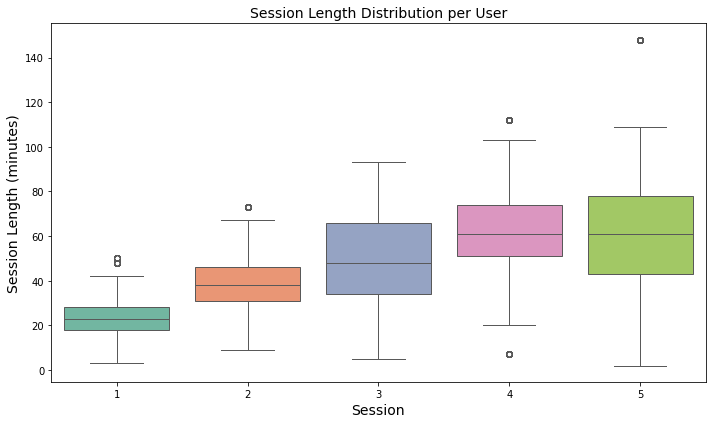

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(x='session', y='session_length', data=filtered_df, palette='Set2')

# Add labels and title
plt.xlabel('Session', fontsize=14)
plt.ylabel('Session Length (minutes)', fontsize=14)
plt.title('Session Length Distribution per User', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

In [81]:
# Calculate summary statistics per session
summary_stats_per_session = filtered_df.groupby('session')['session_length'].describe()

# Set the display format for float numbers
pd.options.display.float_format = '{:.2f}'.format

# Print title
print("Summary Statistics of Session Length in Minutes per Session:")

# Print summary statistics
print(summary_stats_per_session)

Summary Statistics of Session Length in Minutes per Session:
           count  mean   std  min   25%   50%   75%    max
session                                                   
1        4552.00 23.20  8.85 3.00 18.00 23.00 28.00  50.00
2       10576.00 38.56 10.58 9.00 31.00 38.00 46.00  73.00
3       17580.00 51.95 20.76 5.00 34.00 48.00 66.00  93.00
4       28524.00 61.75 17.11 7.00 51.00 61.00 74.00 112.00
5       36526.00 61.61 23.00 2.00 43.00 61.00 78.00 148.00


In [82]:
filtered_df['total_decisions'] = filtered_df.groupby(['uid', 'session'])['uid'].transform('count')
filtered_df['total_errors'] = filtered_df.groupby(['uid', 'session'])['error_count'].transform('sum')

In [83]:
grouped_df = filtered_df.groupby(['uid', 'session', 'level_number']).first().reset_index()

In [84]:
# Sort the DataFrame by 'uid', 'session', and 'level' columns to ensure proper order
grouped_df = grouped_df.sort_values(by=['uid', 'session', 'level_number'])

# Calculate the accumulated duration spent by each player in each session up to a certain level
grouped_df['accumulated_duration'] = grouped_df.groupby(['uid', 'session'])['level_duration_minutes'].cumsum()


In [86]:
# Selecting specific columns
selected_columns = ['uid', 'level_number','session', 'branch','digital_lit1','gender','age','education','session_length','total_decisions', 'total_errors', 'level_duration_minutes','accumulated_duration']

# Filter grouped_df to only include selected columns
filtered_grouped_df = grouped_df[selected_columns]

# Alternatively, you can use loc
filtered_grouped_df = grouped_df.loc[:, selected_columns]

In [87]:
filtered_grouped_df['decisions_per_minute'] = filtered_grouped_df['total_decisions'] / grouped_df['session_length']

In [88]:
filtered_grouped_df['error_rate'] = filtered_grouped_df['total_errors'] / grouped_df['total_decisions']

In [473]:
filtered_grouped_df.head()

,uid,level_number,session,branch,digital_lit1,gender,age,education,session_length,total_decisions,total_errors,level_duration_minutes,accumulated_duration,decisions_per_minute,error_rate,shortest_session_length
0,UGGM001,1,1,Kamuli,Rarely used,Female,58-67,Secondary/HighSchool,35.00,18,0,35.00,35.00,0.51,0.00,35.00
1,UGGM001,1,2,Kamuli,Rarely used,Female,58-67,Secondary/HighSchool,36.00,81,4,10.00,10.00,2.25,0.05,35.00
2,UGGM001,2,2,Kamuli,Rarely used,Female,58-67,Secondary/HighSchool,36.00,81,4,13.00,23.00,2.25,0.05,35.00
3,UGGM001,3,2,Kamuli,Rarely used,Female,58-67,Secondary/HighSchool,36.00,81,4,13.00,36.00,2.25,0.05,35.00
4,UGGM001,2,3,Kamuli,Rarely used,Female,58-67,Secondary/HighSchool,38.00,115,7,27.00,27.00,3.03,0.06,35.00


In [89]:
# Group by 'uid' and 'session' and calculate the error rate
error_rate_df_first_ten = df_first_decisions.groupby(['uid', 'session']).agg(
    error_rate=('error_count', lambda x: x.sum() / len(x))
)

# Reset index to move 'uid' and 'session' back to columns
error_rate_df_first_ten.reset_index(inplace=True)

# Print or use error_rate_df
error_rate_df_first_ten.head()


,uid,session,error_rate
0,UGGM001,1,0.00
1,UGGM001,2,0.03
2,UGGM001,3,0.10
3,UGGM001,4,0.12
4,UGGM001,5,0.20


In [90]:
# Export DataFrame to a CSV file
error_rate_df_first_ten.to_csv('error_rate_df_first_ten.csv', index=False)

In [91]:
# Group by 'uid' and 'session' and calculate the error rate
error_rate_df_level_one = only_level_one_df.groupby(['uid', 'session']).agg(
    error_rate=('error_count', lambda x: x.sum() / len(x))
)

# Reset index to move 'uid' and 'session' back to columns
error_rate_df_level_one.reset_index(inplace=True)

# Print or use error_rate_df
error_rate_df_level_one.head()

,uid,session,error_rate
0,UGGM001,1,0.00
1,UGGM001,2,0.00
2,UGGM001,4,0.44
3,UGGM001,5,0.22
4,UGGM005,1,0.14


In [92]:
# Export DataFrame to a CSV file
error_rate_df_level_one.to_csv('error_rate_df_level_one.csv', index=False)

## 6. Distribution of Decisions Made per User

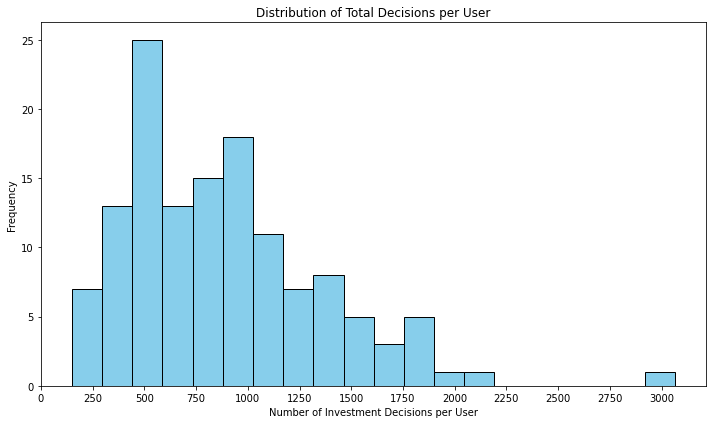

In [93]:
# Plotting the distribution
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(row_counts_per_uid, bins=20, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Number of Investment Decisions per User')
plt.ylabel('Frequency')
plt.title('Distribution of Total Decisions per User')

# Setting x ticks
plt.xticks(range(0, max(row_counts_per_uid)+1, 250))

# Show plot
plt.tight_layout()
plt.show()

## 7. Histogram Survey Question Baseline: Digital Learning Tools

/var/folders/r6/dvxf46c55m58pjzd5rcnbzq00000gn/T/ipykernel_43113/1368437634.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_order, y=category_percentages, palette="Set2")


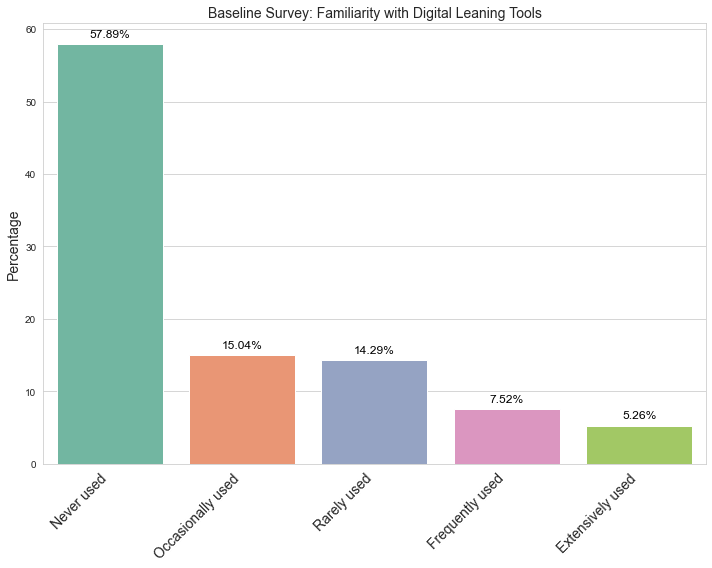

In [96]:
# Group DataFrame by 'uid' and keep only the first row of each group
grouped_df = UG_raw_data.groupby('uid').first().reset_index()

# Count the frequency of each category
category_counts = grouped_df['digital_lit1'].value_counts()

# Sort the categories by frequency in descending order
category_order = category_counts.index.tolist()

# Calculate the percentage of each category
total_responses = len(grouped_df)
category_percentages = (category_counts / total_responses) * 100

# Set the style to a modern one
sns.set_style("whitegrid")

# Set the figure size
plt.figure(figsize=(10, 8))

# Plot the countplot with ordered categories
ax = sns.barplot(x=category_order, y=category_percentages, palette="Set2")

# Annotate each bar with the percentage value, adding distance between bar and text
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),  # Increase y-offset to add more distance
                textcoords='offset points')

plt.ylabel('Percentage', fontsize=14)  # Updated y-axis label
plt.xticks(rotation=45, ha='right', fontsize=14)  # Increase font size of x-axis labels
plt.title('Baseline Survey: Familiarity with Digital Leaning Tools', fontsize=14)

plt.tight_layout()
plt.show()


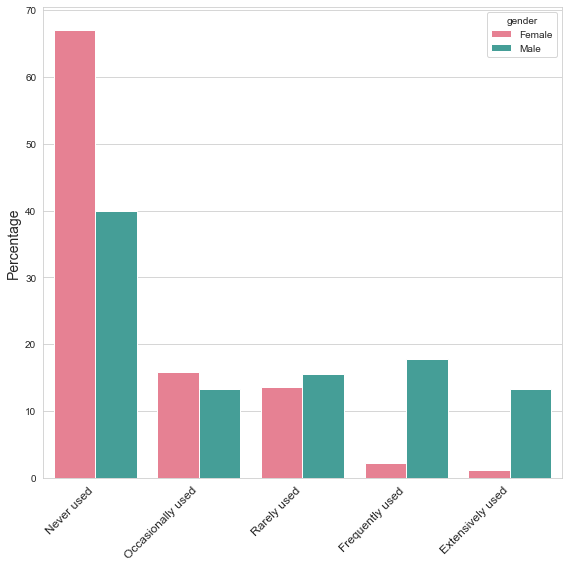

In [97]:
# Group DataFrame by 'uid' and keep only the first row of each group
grouped_df = UG_raw_data.groupby('uid').first().reset_index()

# Count the frequency of each category
category_counts = grouped_df['digital_lit1'].value_counts()

# Sort the categories by frequency in descending order
category_order = category_counts.index.tolist()

# Calculate the percentage of each category within each gender group
category_counts = grouped_df.groupby(['digital_lit1', 'gender']).size().reset_index(name='count')
total_per_gender = category_counts.groupby('gender')['count'].transform('sum')
category_counts['percentage'] = (category_counts['count'] / total_per_gender) * 100

# Set the style to a modern one
sns.set_style("whitegrid")

# Set the figure size
plt.figure(figsize=(8, 8))

# Plot the barplot with ordered categories and hue by gender
sns.barplot(x='digital_lit1', y='percentage', data=category_counts, order=category_order, hue='gender', palette="husl")
plt.ylabel('Percentage', fontsize=14)
plt.xlabel('')
#plt.title('Percentage of Digital Literacy Level by Gender')
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()


## 8. Error Distribution Type 1 and 2

In [99]:
UG_raw_data['error'] = np.where(UG_raw_data['type_one_error'], 'type1', 
                                                np.where(UG_raw_data['type_two_error_adjusted'], 'type2', None))


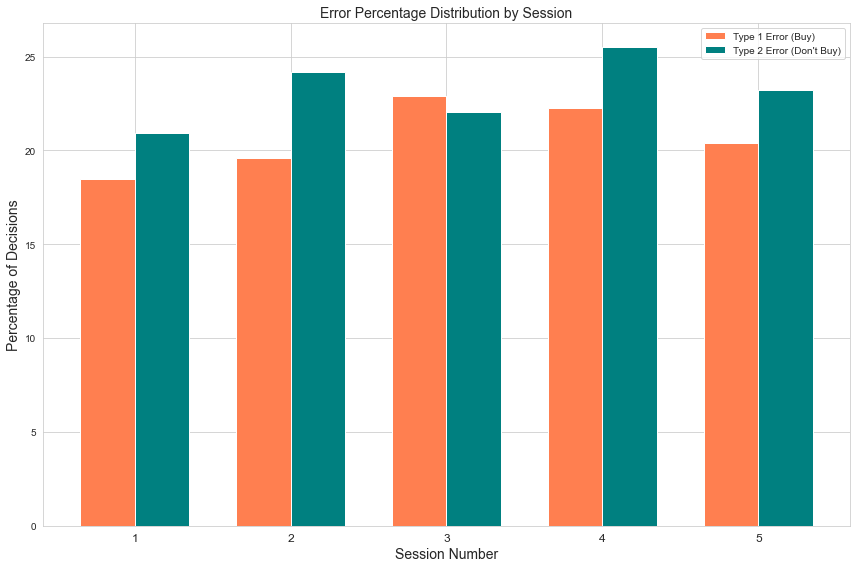

In [101]:
# Get the unique session numbers in the DataFrame
unique_sessions = UG_raw_data['session'].unique()
unique_sessions = np.sort(unique_sessions)

# Initialize lists to store error percentages for each session
type1_error_percentages = []
type2_error_percentages = []

# Iterate over each session
for session in unique_sessions:
    # Filter data for the current session
    session_data = UG_raw_data[UG_raw_data['session'] == session]
    
    # Extract relevant data for the current session
    total_decisions = len(session_data[session_data['decision'].isin(['buyCash', 'loan', 'dontBuy'])]) # Total decisions
    buy_decisions = len(session_data[session_data['decision'].isin(['buyCash', 'loan'])])
    dontbuy_decisions = len(session_data[session_data['decision'].isin(['dontBuy'])])
    
    # Count type 1 errors for buy decisions (buyCash or loan)
    type1_error_count_buy = len(session_data[(session_data['error'] == 'type1') & session_data['decision'].isin(['buyCash', 'loan'])])
    
    # Count type 2 errors for don't buy decisions (dontBuy)
    type2_error_count_dont_buy = len(session_data[(session_data['error'] == 'type2') & (session_data['decision'] == 'dontBuy')])
    
    # Calculate error percentages
    type1_error_percentage = (type1_error_count_buy / buy_decisions) * 100 if buy_decisions > 0 else 0
    type2_error_percentage = (type2_error_count_dont_buy / dontbuy_decisions) * 100 if dontbuy_decisions > 0 else 0
    
    # Append error percentages to the lists
    type1_error_percentages.append(type1_error_percentage)
    type2_error_percentages.append(type2_error_percentage)

# Set the width of the bars
bar_width = 0.35

# Set the x positions for the bars
x = np.arange(len(unique_sessions))

# Plot the combined bar chart with a larger size
plt.figure(figsize=(12, 8))

plt.bar(x - bar_width/2, type1_error_percentages, bar_width, color='coral', label='Type 1 Error (Buy)')
plt.bar(x + bar_width/2, type2_error_percentages, bar_width, color='teal', label='Type 2 Error (Don\'t Buy)')

plt.xlabel('Session Number', fontsize=14)
plt.ylabel('Percentage of Decisions', fontsize=14)
plt.title('Error Percentage Distribution by Session', fontsize=14)
plt.xticks(x, unique_sessions, fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 9. Decisions Speed Overview

In [102]:
# Calculate summary statistics of session length per session
session_summary_stats = filtered_grouped_df.groupby('session')['session_length'].describe()

# Assuming session_summary_stats is your DataFrame containing summary statistics
print(session_summary_stats)

         count  mean   std  min   25%   50%   75%    max
session                                                 
1       169.00 22.39  9.26 3.00 16.00 22.00 28.00  50.00
2       257.00 36.64 11.55 9.00 29.00 36.00 44.00  73.00
3       341.00 48.81 20.32 5.00 33.00 42.00 64.00  93.00
4       429.00 58.72 17.95 7.00 47.00 56.00 73.00 112.00
5       569.00 57.31 23.62 2.00 40.00 57.00 75.00 148.00


In [103]:
# Calculate summary statistics per session
session_summary_stats = filtered_grouped_df.groupby('session')['decisions_per_minute'].describe()

# Round summary statistics to two decimals
session_summary_stats_rounded = session_summary_stats.round(2)

# Display rounded summary statistics for each session in a single table
session_summary_stats_rounded

,count,mean,std,min,25%,50%,75%,max
session,,,,,,,,
1,169.00,2.82,1.65,0.43,1.64,2.61,3.42,9.29
2,257.00,3.11,1.98,0.43,1.85,2.69,3.68,14.35
3,341.00,3.91,2.61,0.02,2.29,3.22,5.03,17.16
4,429.00,4.81,2.67,0.57,2.88,4.32,6.29,12.93
5,569.00,5.75,3.01,0.55,3.54,5.25,7.60,15.43


/var/folders/r6/dvxf46c55m58pjzd5rcnbzq00000gn/T/ipykernel_43113/3143961290.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='session', y='decisions_per_minute', data=filtered_grouped_df, inner=None, linewidth=1.3, palette="Set2")


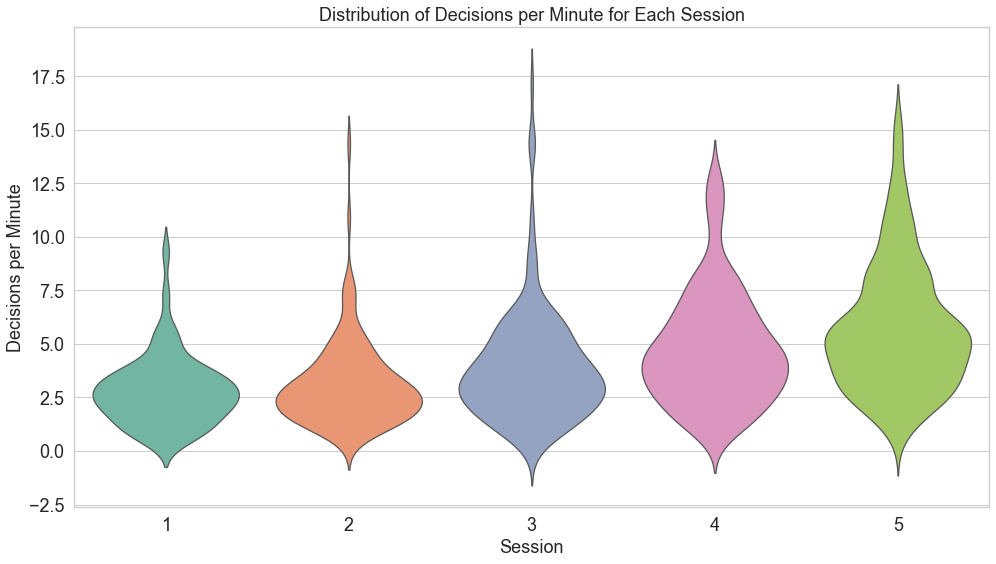

In [104]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create the violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='session', y='decisions_per_minute', data=filtered_grouped_df, inner=None, linewidth=1.3, palette="Set2")
#sns.swarmplot(x='session', y='decisions_per_minute', data=filtered_grouped_df, color="k", alpha=0.5)

plt.xlabel('Session', fontsize=18)
plt.ylabel('Decisions per Minute', fontsize=18)
plt.title('Distribution of Decisions per Minute for Each Session', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.show()


## 10. Overview Decisions based on ROI and decision made

In [106]:
df_without_cant_afford = UG_raw_data[UG_raw_data['can_afford_in_cash'] == True]


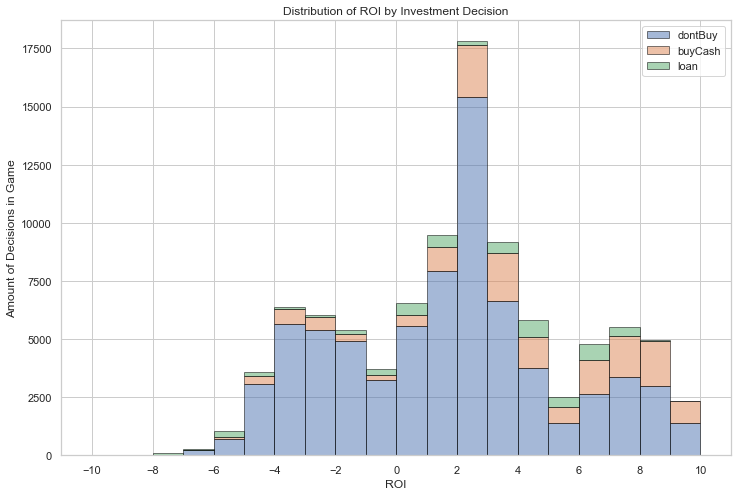

In [107]:
# Assuming df_without_cant_afford is your DataFrame and 'roi_from_asset' and 'decision' are the column names
roi_values = df_without_cant_afford['roi_from_asset']
buy_decision = df_without_cant_afford['decision']

# Get unique buy decisions for labeling
unique_decisions = buy_decision.unique()

# Calculate the histogram data for each buy decision
hist_data = []
for decision in unique_decisions:
    hist_data.append(roi_values[buy_decision == decision])

# Plotting the distribution of ROI in a stacked bar chart
plt.figure(figsize=(12, 8))
plt.hist(hist_data, bins=20, stacked=True, alpha=0.5, label=unique_decisions, edgecolor='black')

plt.xlabel('ROI')
plt.ylabel('Amount of Decisions in Game')
plt.title('Distribution of ROI by Investment Decision')
plt.legend()
plt.xticks(range(-10, 12, 2))  # Setting ticks from -10 to 10 with intervals of 2
plt.grid(True)
plt.show()

In [108]:
# Group the DataFrame by "uid" and count the number of rows for each unique value in "treatment_group"
grouped_counts = df_without_cant_afford['decision'].value_counts()

# Calculate percentages
total_rows = grouped_counts.sum()
percentages = round((grouped_counts / total_rows) * 100, 2)

# Create a DataFrame to display counts and percentages
summary_table = pd.concat([grouped_counts, percentages], axis=1)
summary_table.columns = ['Count', 'Percentage']

print(summary_table)

          Count  Percentage
decision                   
dontBuy   74142       77.62
buyCash   16123       16.88
loan       5255        5.50


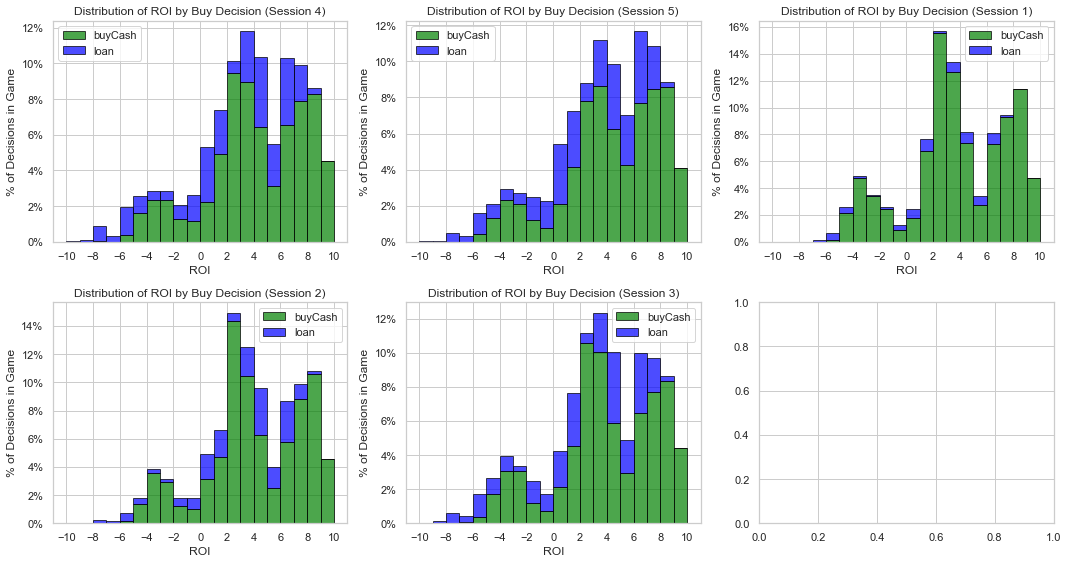

In [109]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_without_cant_afford is your DataFrame and 'roi_from_asset', 'decision', and 'session' are the column names

# Get the unique session numbers in the DataFrame
unique_sessions = df_without_cant_afford['session'].unique()

# Define fixed colors for decisions
decision_colors = {'loan': 'blue', 'buyCash': 'green'}

# Determine the number of rows and columns for subplots based on the number of unique sessions
num_rows = (len(unique_sessions) + 2) // 3  # Divide by 3 and round up
num_cols = min(len(unique_sessions), 3)

# Create subplots for each session
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 8))

for i, session in enumerate(unique_sessions):
    # Filter data for the current session and only include 'buyCash' and 'loan' decisions
    session_data = df_without_cant_afford[(df_without_cant_afford['session'] == session) & df_without_cant_afford['decision'].isin(['buyCash', 'loan'])]
    
    # Extract ROI values and buy decisions for the current session
    roi_values = session_data['roi_from_asset']
    buy_decision = session_data['decision']
    
    # Get unique buy decisions for labeling
    unique_decisions = buy_decision.unique()
    
    # Calculate the histogram data for each buy decision
    hist_data = []
    for decision in unique_decisions:
        hist_data.append(roi_values[buy_decision == decision])
    
    # Determine the subplot position
    row = i // 3
    col = i % 3
    
    # Plotting the distribution of ROI in a stacked bar chart for the current session
    bins = np.linspace(-10, 10, 21)  # Ensure the same bin size for each session
    axs[row, col].hist(hist_data, bins=bins, stacked=True, alpha=0.7, label=unique_decisions, color=[decision_colors[decision] for decision in unique_decisions], edgecolor='black', density=True)
    
    # Convert y-axis ticks to percentages
    axs[row, col].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
    
    axs[row, col].set_xlabel('ROI')
    axs[row, col].set_ylabel('% of Decisions in Game')
    axs[row, col].set_title(f'Distribution of ROI by Buy Decision (Session {session})')
    axs[row, col].legend()
    axs[row, col].set_xticks(range(-10, 12, 2))  # Setting ticks from -10 to 10 with intervals of 2
    axs[row, col].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()
